In [109]:
import pandas as pd
import numpy as np

In [213]:
df_consolidado = pd.read_csv('C:/Users/Pedro/Desktop/TCC Mariana/TCC_Microdados/consolidado.csv')

C:\Users\Pedro\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [226]:
df_consolidado.shape

(6038947, 51)

In [214]:
from datetime import datetime
df_consolidado['nr_ano_mes_chegada_real'] = pd.to_datetime(df_consolidado['nr_ano_mes_chegada_real'], format='%Y-%m').dt.strftime('%m/%Y')

In [215]:
df_consolidado['nr_mes_chegada_real'] = df_consolidado['nr_mes_chegada_real'].values.astype(np.int64)

In [98]:
df_consolidado['nr_ano_mes_chegada_real'].head(2)

0    01/2014
1    01/2014
Name: nr_ano_mes_chegada_real, dtype: object

In [3]:
#coluna com o total de pax, pagos + grátis
df_consolidado['total_pax'] = df_consolidado['nr_passag_pagos'] + df_consolidado['nr_passag_gratis']
df_consolidado.head(2)

,Unnamed: 0,Unnamed: 0.1,id_basica,sg_empresa_iata,nm_empresa,nm_pais,ds_tipo_empresa,nr_voo,dt_referencia,nm_dia_semana_referencia,...,sg_uf_destino,nm_regiao_destino,nm_pais_destino,nm_continente_destino,nr_assentos_ofertados,nr_passag_pagos,nr_passag_gratis,nr_decolagem,total_pax,pais_origem_cia
0,0,0,10885949,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,6956,2014-01-06,SEGUNDA-FEIRA,...,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,118,85,2,1,87,NaN
1,1,1,10883688,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,4020,2014-01-03,SEXTA-FEIRA,...,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,106,73,4,1,77,NaN


In [4]:
#gap entre o número de assentos ofertados e de pax que realmente voaram
df_consolidado['assentos_livres'] = df_consolidado['nr_assentos_ofertados'] - df_consolidado['total_pax']
df_consolidado.head(2)

,Unnamed: 0,Unnamed: 0.1,id_basica,sg_empresa_iata,nm_empresa,nm_pais,ds_tipo_empresa,nr_voo,dt_referencia,nm_dia_semana_referencia,...,nm_regiao_destino,nm_pais_destino,nm_continente_destino,nr_assentos_ofertados,nr_passag_pagos,nr_passag_gratis,nr_decolagem,total_pax,pais_origem_cia,assentos_livres
0,0,0,10885949,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,6956,2014-01-06,SEGUNDA-FEIRA,...,SUDESTE,BRASIL,AMÉRICA DO SUL,118,85,2,1,87,NaN,31
1,1,1,10883688,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,4020,2014-01-03,SEXTA-FEIRA,...,SUDESTE,BRASIL,AMÉRICA DO SUL,106,73,4,1,77,NaN,29


In [5]:
#qtde de voos que pousaram
df_consolidado['nr_voo'].nunique()

8217

In [6]:
df_consolidado.query('nr_voo == 5245')

,Unnamed: 0,Unnamed: 0.1,id_basica,sg_empresa_iata,nm_empresa,nm_pais,ds_tipo_empresa,nr_voo,dt_referencia,nm_dia_semana_referencia,...,nm_regiao_destino,nm_pais_destino,nm_continente_destino,nr_assentos_ofertados,nr_passag_pagos,nr_passag_gratis,nr_decolagem,total_pax,pais_origem_cia,assentos_livres
2829918,641350,641404,11956260,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,5245,2016-08-08,SEGUNDA-FEIRA,...,NORTE,BRASIL,AMÉRICA DO SUL,118,48,2,1,50,NaN,68
2833847,645279,645333,11961190,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,5245,2016-08-15,SEGUNDA-FEIRA,...,NORTE,BRASIL,AMÉRICA DO SUL,118,50,2,1,52,NaN,66
2837884,649316,649370,11966164,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,5245,2016-08-22,SEGUNDA-FEIRA,...,NORTE,BRASIL,AMÉRICA DO SUL,118,61,1,1,62,NaN,56
2841828,653260,653314,11971015,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,5245,2016-08-29,SEGUNDA-FEIRA,...,NORTE,BRASIL,AMÉRICA DO SUL,118,65,2,1,67,NaN,51
2906120,717552,717609,12172501,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,5245,2016-09-05,SEGUNDA-FEIRA,...,NORTE,BRASIL,AMÉRICA DO SUL,118,74,5,1,79,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967469,885773,885899,20925225,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,NaN,TRANSPORTE AÉREO REGULAR,5245,27/12/2019,SEXTA-FEIRA,...,NORTE,BRASIL,AMÉRICA DO SUL,118,96,6,1,102,BRASIL,16
5967855,886159,886285,20925668,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,NaN,TRANSPORTE AÉREO REGULAR,5245,29/12/2019,DOMINGO,...,NORTE,BRASIL,AMÉRICA DO SUL,118,42,1,1,43,BRASIL,75
6033921,952225,952500,20928318,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,NaN,TRANSPORTE AÉREO REGULAR,5245,03/12/2019,TERÇA-FEIRA,...,NORTE,BRASIL,AMÉRICA DO SUL,118,83,3,1,86,BRASIL,32
6033959,952263,952538,20928361,AD,AZUL LINHAS AÉREAS BRASILEIRAS S/A,NaN,TRANSPORTE AÉREO REGULAR,5245,13/12/2019,SEXTA-FEIRA,...,NORTE,BRASIL,AMÉRICA DO SUL,118,84,2,1,86,BRASIL,32


In [7]:
df_consolidado['nr_ano_mes_chegada_real'].head(2)

0    2014-01
1    2014-01
Name: nr_ano_mes_chegada_real, dtype: object

In [8]:
df_consolidado.describe()

,Unnamed: 0,Unnamed: 0.1,id_basica,nr_voo,nr_ano_partida_real,nr_semestre_partida_real,nr_trimestre_partida_real,nr_mes_partida_real,nr_semana_partida_real,nr_dia_partida_real,...,nr_trimestre_chegada_real,nr_mes_chegada_real,nr_semana_chegada_real,nr_dia_chegada_real,nr_assentos_ofertados,nr_passag_pagos,nr_passag_gratis,nr_decolagem,total_pax,assentos_livres
count,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,...,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06,6.038947e+06
mean,5.052025e+05,5.052426e+05,1.521329e+07,3.745222e+03,2.016411e+03,1.505918e+00,2.504205e+00,6.501509e+00,2.685355e+01,1.572724e+01,...,2.504968e+00,6.504272e+00,2.686440e+01,1.573634e+01,1.501351e+02,1.177125e+02,2.174638e+00,9.992795e-01,1.198871e+02,3.024798e+01
std,2.940034e+05,2.940249e+05,2.979635e+06,2.367247e+03,1.722940e+00,4.999650e-01,1.125263e+00,3.486424e+00,1.522457e+01,8.780460e+00,...,1.125265e+00,3.486408e+00,1.522457e+01,8.780792e+00,5.955229e+01,5.655065e+01,3.208860e+00,2.683227e-02,5.702051e+01,3.040869e+01
min,0.000000e+00,0.000000e+00,6.626957e+06,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.910000e+02
25%,2.516220e+05,2.516490e+05,1.255193e+07,1.841000e+03,2.015000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.300000e+01,8.000000e+00,...,1.000000e+00,3.000000e+00,1.400000e+01,8.000000e+00,1.180000e+02,8.300000e+01,0.000000e+00,1.000000e+00,8.500000e+01,8.000000e+00
50%,5.032450e+05,5.032830e+05,1.470705e+07,3.362000e+03,2.016000e+03,2.000000e+00,3.000000e+00,7.000000e+00,2.700000e+01,1.600000e+01,...,3.000000e+00,7.000000e+00,2.700000e+01,1.600000e+01,1.620000e+02,1.170000e+02,1.000000e+00,1.000000e+00,1.190000e+02,2.200000e+01
75%,7.548680e+05,7.549140e+05,1.791214e+07,5.095000e+03,2.018000e+03,2.000000e+00,4.000000e+00,1.000000e+01,4.000000e+01,2.300000e+01,...,4.000000e+00,1.000000e+01,4.000000e+01,2.300000e+01,1.770000e+02,1.520000e+02,3.000000e+00,1.000000e+00,1.550000e+02,4.300000e+01
max,1.098709e+06,1.098930e+06,2.155631e+07,9.999000e+03,2.019000e+03,2.000000e+00,4.000000e+00,1.200000e+01,5.300000e+01,3.100000e+01,...,4.000000e+00,1.200000e+01,5.300000e+01,3.100000e+01,9.950000e+02,9.920000e+02,4.540000e+02,1.000000e+00,9.960000e+02,7.630000e+02


In [9]:
pd.set_option('display.max_rows', None)

In [137]:
#quantidade de chegadas ao Brasil, de outros países
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nr_ano_mes_chegada_real')
    .agg(qtde_chegadas = ('id_basica', 'count')) #incluir mais uma analise: nr_pax
    .sort_values(by='qtde_chegadas', ascending=False)
    .head(10)
)

,qtde_chegadas
nr_ano_mes_chegada_real,
01/2019,6887
12/2018,6394
01/2018,6391
07/2018,6269
03/2019,6141
08/2018,6042
07/2014,6028
02/2019,6025
01/2015,6021


In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 12


In [ ]:
#ax = sns.countplot('nr_ano_mes_chegada_real', data=df_consolidado)
#ax.set_title('Quantidade de chegadas ao Brasil, de outros países')
#ax.set_xlabel('nr_ano_mes_chegada_real')
#ax.set_ylabel('qtde_chegadas')
#plt.xticks(rotation=90)#.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

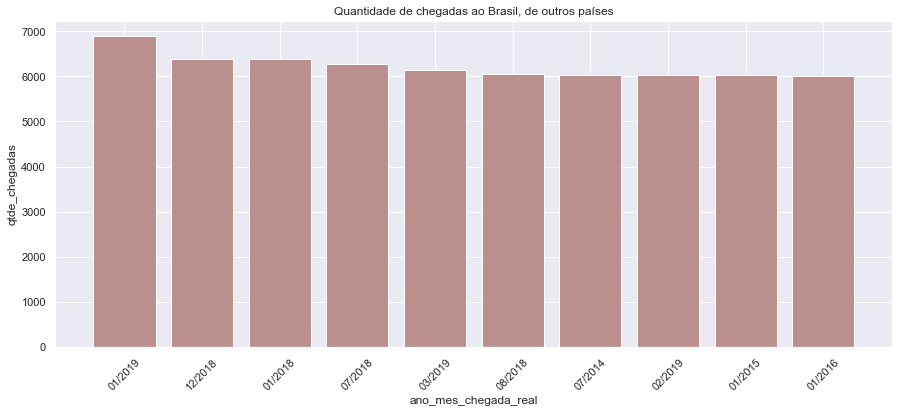

In [140]:
meses = ['01/2019', '12/2018', '01/2018', '07/2018', '03/2019', '08/2018', '07/2014', '02/2019','01/2015','01/2016']
qtde_chegadas = [6887, 6394, 6391, 6269, 6141, 6042, 6028, 6025, 6021, 6013]
plt.bar(meses, qtde_chegadas, color = 'rosybrown')
plt.title('Quantidade de chegadas ao Brasil, de outros países')
plt.xlabel('ano_mes_chegada_real')
plt.ylabel('qtde_chegadas')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [141]:
#quantidade de pax chegando ao Brasil, vindos de outros países
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nr_ano_mes_chegada_real')
    .agg(qtde_pax = ('total_pax', 'sum'))
    .sort_values(by='qtde_pax', ascending=False)
    .head(10)
)

,qtde_pax
nr_ano_mes_chegada_real,
01/2019,1217841
01/2018,1180145
07/2019,1121706
07/2018,1118049
01/2015,1068805
12/2018,1062169
01/2016,1040452
07/2017,1035232
03/2019,1031611


In [ ]:
#ax = sns.countplot('nr_ano_mes_chegada_real', data=df_consolidado)
#ax.set_title('Quantidade de pax chegando ao Brasil, de outros países')
#ax.set_xlabel('nr_ano_mes_chegada_real')
#ax.set_ylabel('qtde_pax')
#plt.xticks(rotation=45)#.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

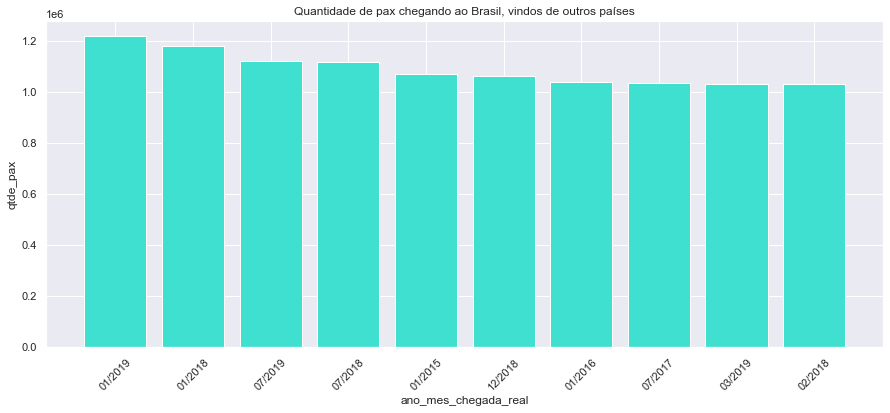

In [142]:
meses = ['01/2019', '01/2018', '07/2019', '07/2018', '01/2015', '12/2018', '01/2016', '07/2017','03/2019','02/2018']
qtde_pax = [1217841, 1180145, 1121706, 1118049, 1068805, 1062169, 1040452, 1035232, 1031611, 1030026]
plt.bar(meses, qtde_pax, color = 'turquoise')
plt.title('Quantidade de pax chegando ao Brasil, vindos de outros países')
plt.xlabel('ano_mes_chegada_real')
plt.ylabel('qtde_pax')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [132]:
#sazonalidade por dia da semana
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nm_dia_semana_chegada_real')
    .agg(qtde_chegadas_dia_semana = ('id_basica', 'count')) #incluir mais uma analise: nr_pax
    .sort_values(by='qtde_chegadas_dia_semana', ascending=False)
    .head(7)
)

,qtde_chegadas_dia_semana
nm_dia_semana_chegada_real,
DOMINGO,61382
SÁBADO,58723
QUINTA-FEIRA,57632
SEGUNDA-FEIRA,56438
SEXTA-FEIRA,56042
TERÇA-FEIRA,54967
QUARTA-FEIRA,53807


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

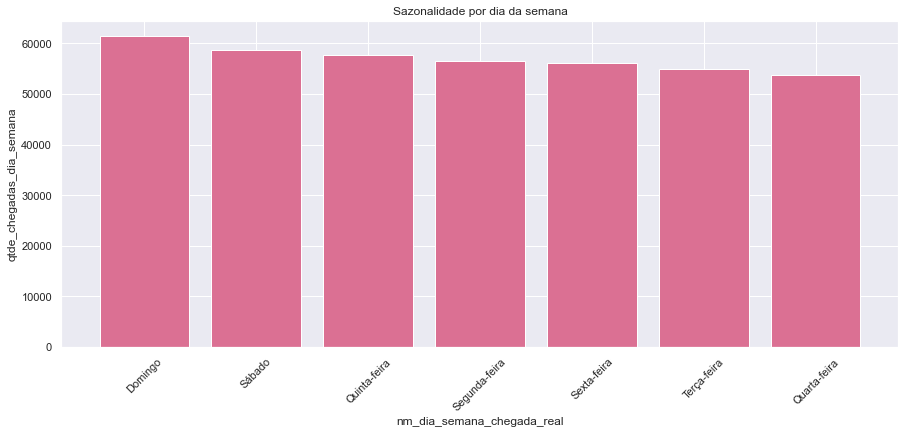

In [149]:
dias_semana = ['Domingo', 'Sábado', 'Quinta-feira', 'Segunda-feira', 'Sexta-feira', 'Terça-feira', 'Quarta-feira']
qtde_chegadas_dia_semana = [61382, 58723, 57632, 56438, 56042, 54967, 53807]
plt.bar(dias_semana, qtde_chegadas_dia_semana, color = 'palevioletred')
plt.title('Sazonalidade por dia da semana')
plt.xlabel('nm_dia_semana_chegada_real')
plt.ylabel('qtde_chegadas_dia_semana')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [216]:
#sazonalidade por mês do ano
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nr_mes_chegada_real')
    .agg(qtde_chegadas_mes_ano = ('nr_mes_chegada_real', 'count')) #incluir mais uma analise: nr_pax
    .sort_values(by='qtde_chegadas_mes_ano', ascending=False)
    .head(12)
)

,qtde_chegadas_mes_ano
nr_mes_chegada_real,
1,36326
7,35369
12,34863
8,33997
3,33738
10,32734
2,32563
9,32294
5,32138


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

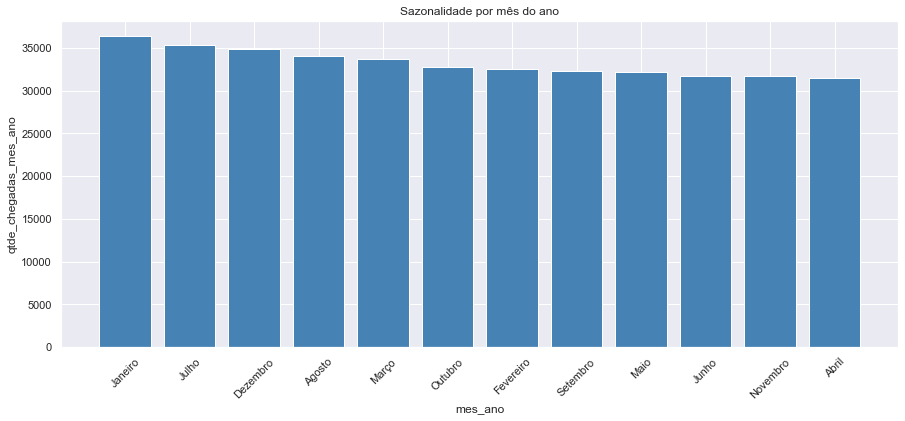

In [222]:
mes_ano = ['Janeiro', 'Julho', 'Dezembro', 'Agosto', 'Março', 'Outubro', 'Fevereiro', 'Setembro', 'Maio', 'Junho', 'Novembro', 'Abril']
qtde_chegadas_mes_ano = [36326, 35369, 34863, 33997, 33738, 32734, 32563, 32294, 32138, 31728, 31722, 31519]
plt.bar(mes_ano, qtde_chegadas_mes_ano, color = 'steelblue')
plt.title('Sazonalidade por mês do ano')
plt.xlabel('mes_ano')
plt.ylabel('qtde_chegadas_mes_ano')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [ ]:
#ax = sns.countplot('nm_dia_semana_chegada_real', data=df_consolidado)
#ax.set_title('Sazonalidade por dia da semana')
#ax.set_xlabel('nm_dia_semana_chegada_real')
#ax.set_ylabel('qtde_chegadas_dia_semana')
#plt.rcParams['figure.figsize']=(10, 5)
#plt.xticks(rotation=45)#.show()

In [150]:
#quantidade de viagens internas no país
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem == "BRASIL"')
    .groupby('nr_ano_mes_chegada_real') #transformar em ano/mês
    .agg(viagens_locais = ('id_basica', 'count'))
    .sort_values(by='viagens_locais', ascending=False) #mudar a ordenação (sazonalidade)
    .head(10)
)

,viagens_locais
nr_ano_mes_chegada_real,
01/2014,85496
01/2015,85305
12/2014,84752
10/2014,83124
07/2015,83039
12/2015,81853
01/2016,81721
07/2014,81367
03/2015,80520


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

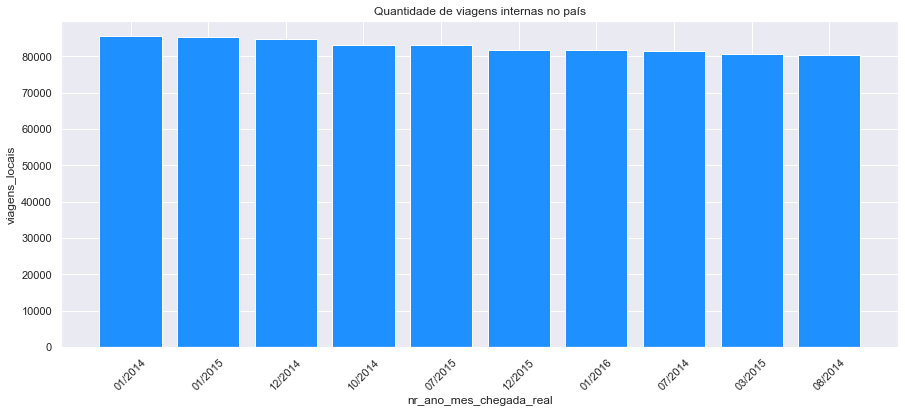

In [151]:
meses = ['01/2014', '01/2015', '12/2014', '10/2014', '07/2015', '12/2015', '01/2016', '07/2014', '03/2015','08/2014']
viagens_locais = [85496, 85305, 84752, 83124, 83039, 81853, 81721, 81367, 80520, 80247]
plt.bar(meses, viagens_locais, color = 'dodgerblue')
plt.title('Quantidade de viagens internas no país')
plt.xlabel('nr_ano_mes_chegada_real')
plt.ylabel('viagens_locais')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [ ]:
#ax = sns.countplot('nr_ano_mes_chegada_real', data=df_consolidado)
#ax.set_title('Quantidade de viagens internas no país')
#ax.set_xlabel('nr_ano_mes_chegada_real')
#ax.set_ylabel('viagens_locais')
#plt.rcParams['figure.figsize']=(30, 15)
#plt.xticks(rotation=90)#.show()

In [154]:
#cidades mais visitadas por turistas de outros países - ok
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nm_municipio_destino')
    .agg(qtde_visitas = ('id_basica', 'count'))
    .sort_values(by='qtde_visitas', ascending=False)
    .head(10)
)

,qtde_visitas
nm_municipio_destino,
GUARULHOS,221887
RIO DE JANEIRO,74882
CAMPINAS,23768
PORTO ALEGRE,12537
BRASÍLIA,11864
MANAUS,8814
CONFINS,8608
RECIFE,6771
SALVADOR,6452


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

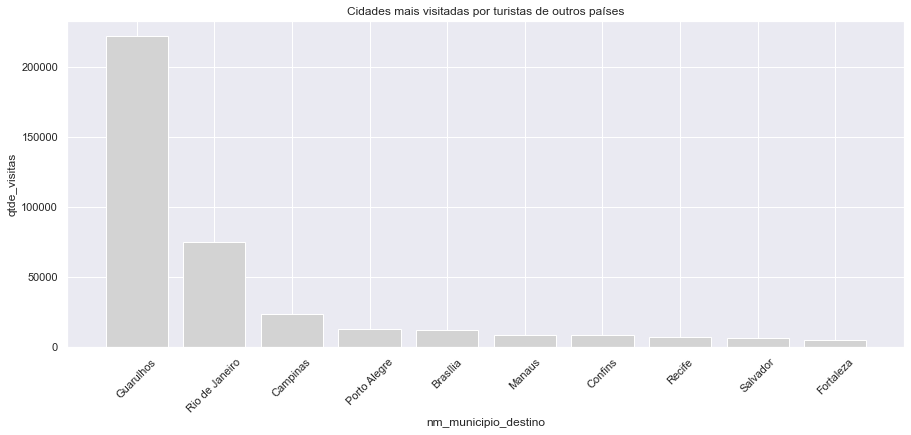

In [166]:
nm_municipio_destino = ['Guarulhos', 'Rio de Janeiro', 'Campinas', 'Porto Alegre', 'Brasília', 'Manaus', 'Confins', 'Recife', 'Salvador','Fortaleza']
qtde_visitas = [221887, 74882, 23768, 12537, 11864, 8814, 8608, 6771, 6452, 5224]
plt.bar(nm_municipio_destino, qtde_visitas, color = 'lightgray')
plt.title('Cidades mais visitadas por turistas de outros países')
plt.xlabel('nm_municipio_destino')
plt.ylabel('qtde_visitas')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [158]:
#cidades mais visitadas por turistas de outros países (nr_voo) - qtde de voos que chegaram
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nm_municipio_destino')
    .agg(cidades_visitadas = ('nr_voo', 'nunique'))
    .sort_values(by='cidades_visitadas', ascending=False)
    .head(10)
)

,cidades_visitadas
nm_municipio_destino,
GUARULHOS,977
RIO DE JANEIRO,883
CAMPINAS,610
CONFINS,264
MANAUS,256
PORTO ALEGRE,256
RECIFE,241
SALVADOR,222
BRASÍLIA,211


In [ ]:
#ax = sns.countplot('nm_dia_semana_chegada_real', data=df_consolidado)
#ax.set_title('Sazonalidade por dia da semana')
#ax.set_xlabel('nm_dia_semana_chegada_real')
#ax.set_ylabel('qtde_chegadas_dia_semana')
#plt.rcParams['figure.figsize']=(10, 5)
#plt.xticks(rotation=45)#.show()

In [159]:
#cidades mais visitadas por turistas brasileiros (em viagens internas)
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem == "BRASIL"')
    .groupby('nm_municipio_destino')
    .agg(cidades_visitadas_local = ('id_basica', 'count'))
    .sort_values(by='cidades_visitadas_local', ascending=False)
    .head(10)
)

,cidades_visitadas_local
nm_municipio_destino,
GUARULHOS,590368
RIO DE JANEIRO,551002
SÃO PAULO,515942
BRASÍLIA,409245
CAMPINAS,320930
CONFINS,298104
SALVADOR,197704
PORTO ALEGRE,192932
SÃO JOSÉ DOS PINHAIS,190233


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

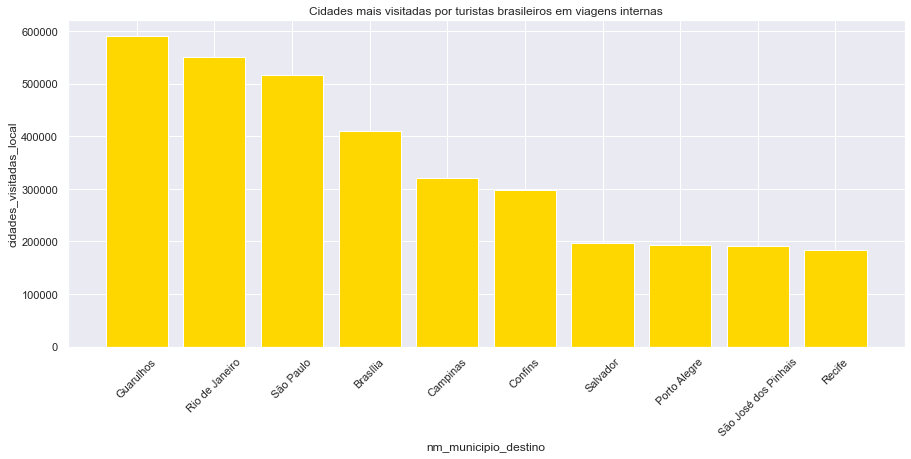

In [161]:
nm_municipio_destino = ['Guarulhos', 'Rio de Janeiro', 'São Paulo', 'Brasília', 'Campinas', 'Confins', 'Salvador', 'Porto Alegre', 'São José dos Pinhais','Recife']
cidades_visitadas_local = [590368, 551002, 515942, 409245, 320930, 298104, 197704, 192932, 190233, 183234]
plt.bar(nm_municipio_destino, cidades_visitadas_local, color = 'gold')
plt.title('Cidades mais visitadas por turistas brasileiros em viagens internas')
plt.xlabel('nm_municipio_destino')
plt.ylabel('cidades_visitadas_local')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [165]:
#maiores continentes emissores de turistas para o Brasil
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nm_continente_origem')
    .agg(continente_emissor = ('id_basica', 'count'))
    .sort_values(by='continente_emissor', ascending=False)
    .head(6)
)

,continente_emissor
nm_continente_origem,
AMÉRICA DO SUL,177217
AMÉRICA DO NORTE,91482
EUROPA,82577
AMÉRICA CENTRAL,28238
ÁFRICA,11379
ÁSIA,8096


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

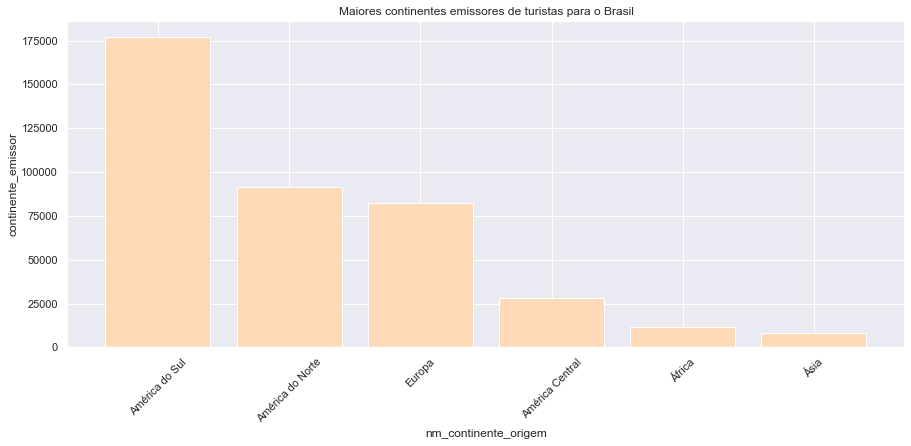

In [167]:
nm_continente_origem = ['América do Sul', 'América do Norte', 'Europa', 'América Central', 'África', 'Ásia']
continente_emissor = [177217, 91482, 82577, 28238, 11379, 8096]
plt.bar(nm_continente_origem, continente_emissor, color = 'peachpuff')
plt.title('Maiores continentes emissores de turistas para o Brasil')
plt.xlabel('nm_continente_origem')
plt.ylabel('continente_emissor')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [168]:
#maiores países emissores de turistas para o Brasil
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nm_pais_origem')
    .agg(país_emissor = ('id_basica', 'count'))
    .sort_values(by='país_emissor', ascending=False)
    .head(10)
)

,país_emissor
nm_pais_origem,
ARGENTINA,85588
ESTADOS UNIDOS DA AMÉRICA,83427
CHILE,33088
PANAMÁ,24108
PORTUGAL,23611
URUGUAI,15440
PERU,14527
ESPANHA,12571
FRANÇA,10140


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

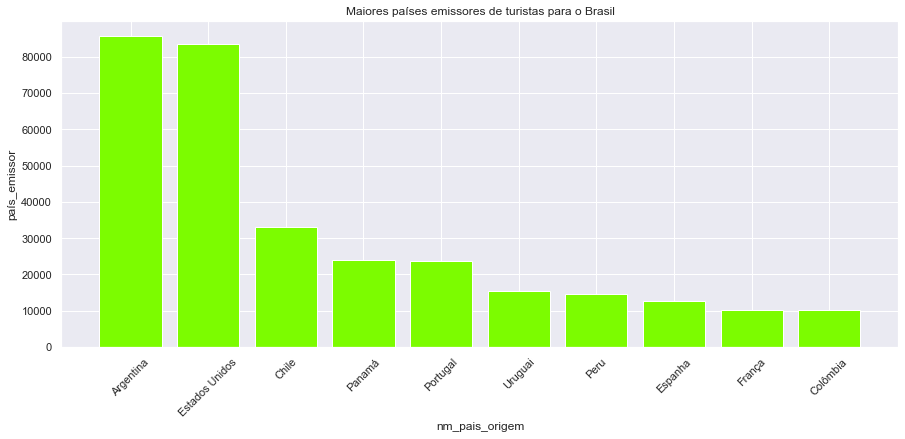

In [169]:
nm_pais_origem = ['Argentina', 'Estados Unidos', 'Chile', 'Panamá', 'Portugal', 'Uruguai', 'Peru', 'Espanha', 'França', 'Colômbia']
país_emissor = [85588, 83427, 33088, 24108, 23611, 15440, 14527, 12571, 10140, 10109]
plt.bar(nm_pais_origem, país_emissor, color = 'lawngreen')
plt.title('Maiores países emissores de turistas para o Brasil')
plt.xlabel('nm_pais_origem')
plt.ylabel('país_emissor')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [170]:
#maiores cidades internacionais emissoras de turistas para o Brasil
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nm_municipio_origem')
    .agg(cidade_emissora = ('id_basica', 'count'))
    .sort_values(by='cidade_emissora', ascending=False)
    .head(10)
)

,cidade_emissora
nm_municipio_origem,
"EZEIZA, BUENOS AIRES PROVINCE",47868
"MIAMI, FLORIDA",37372
SANTIAGO,33057
BUENOS AIRES,27911
PANAMA,24108
LISBOA,22219
"CALLAO/LIMA, LIMA METROPOLITAN AREA",14524
"MONTEVIDEO, MONTEVIDEO",14448
"NEW YORK, NEW YORK",11033


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

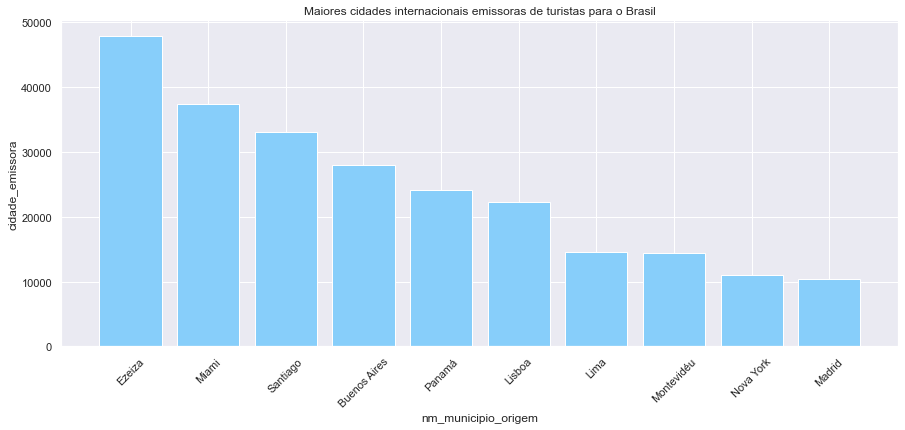

In [172]:
nm_municipio_origem = ['Ezeiza', 'Miami', 'Santiago', 'Buenos Aires', 'Panamá', 'Lisboa', 'Lima', 'Montevidéu', 'Nova York', 'Madrid']
cidade_emissora = [47868, 37372, 33057, 27911, 24108, 22219, 14524, 14448, 11033, 10445]
plt.bar(nm_municipio_origem, cidade_emissora, color = 'lightskyblue')
plt.title('Maiores cidades internacionais emissoras de turistas para o Brasil')
plt.xlabel('nm_municipio_origem')
plt.ylabel('cidade_emissora')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [183]:
#número de passageiros de outros países que ocupam assentos comercializados ao público e que geram receita com a compra de assentos
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nr_ano_mes_chegada_real')
    .agg(pax_world_pagos = ('nr_passag_pagos', 'sum'))
    .sort_values(by='pax_world_pagos', ascending=False)
    .head(10)
)

,pax_world_pagos
nr_ano_mes_chegada_real,
01/2019,1202888
01/2018,1167340
07/2019,1107539
07/2018,1102715
01/2015,1058429
12/2018,1046079
01/2016,1030162
07/2017,1024621
02/2018,1017339


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

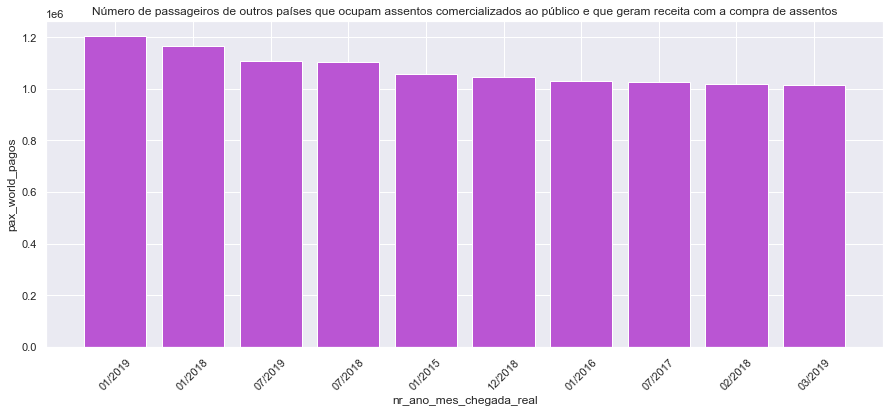

In [188]:
nr_ano_mes_chegada_real = ['01/2019', '01/2018', '07/2019', '07/2018', '01/2015', '12/2018', '01/2016', '07/2017', '02/2018','03/2019']
pax_world_pagos = [1202888, 1167340, 1107539, 1102715, 1058429, 1046079, 1030162, 1024621, 1017339, 1016288]
plt.bar(nr_ano_mes_chegada_real, pax_world_pagos, color = 'mediumorchid')
plt.title('Número de passageiros de outros países que ocupam assentos comercializados ao público e que geram receita com a compra de assentos')
plt.xlabel('nr_ano_mes_chegada_real')
plt.ylabel('pax_world_pagos')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [190]:
#número de passageiros do Brasil que ocupam assentos comercializados ao público e que geram receita com a compra de assentos
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem == "BRASIL"')
    .groupby('nr_ano_mes_chegada_real')
    .agg(pax_local_pagos = ('nr_passag_pagos', 'sum'))
    .sort_values(by='pax_local_pagos', ascending=False)
    .head(10)
)

,pax_local_pagos
nr_ano_mes_chegada_real,
01/2015,9792182
07/2015,9350903
12/2014,9314100
01/2016,9185692
01/2014,9137137
01/2019,9043828
07/2018,8976626
12/2019,8954024
10/2014,8848470


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

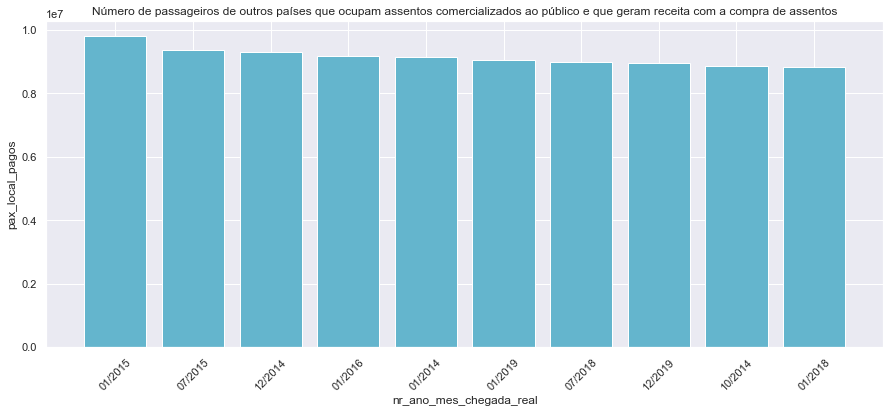

In [191]:
nr_ano_mes_chegada_real = ['01/2015', '07/2015', '12/2014', '01/2016', '01/2014', '01/2019', '07/2018', '12/2019','10/2014', '01/2018']
pax_local_pagos = [9792182, 9350903, 9314100, 9185692, 9137137, 9043828, 8976626, 8954024, 8848470, 8822818]
plt.bar(nr_ano_mes_chegada_real, pax_local_pagos, color = 'c')
plt.title('Número de passageiros de outros países que ocupam assentos comercializados ao público e que geram receita com a compra de assentos')
plt.xlabel('nr_ano_mes_chegada_real')
plt.ylabel('pax_local_pagos')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [193]:
#número de passageiros de outros países que ocupam assentos comercializados ao público, mas NÃO geram receita com a compra de assentos
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nr_ano_mes_chegada_real')
    .agg(pax_world_gratis = ('nr_passag_gratis', 'sum'))
    .sort_values(by='pax_world_gratis', ascending=False)
    .head(10)
)

,pax_world_gratis
nr_ano_mes_chegada_real,
12/2019,17906
12/2018,16090
01/2014,15349
07/2018,15334
03/2019,15323
01/2019,14953
08/2018,14736
11/2018,14728
11/2019,14669


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

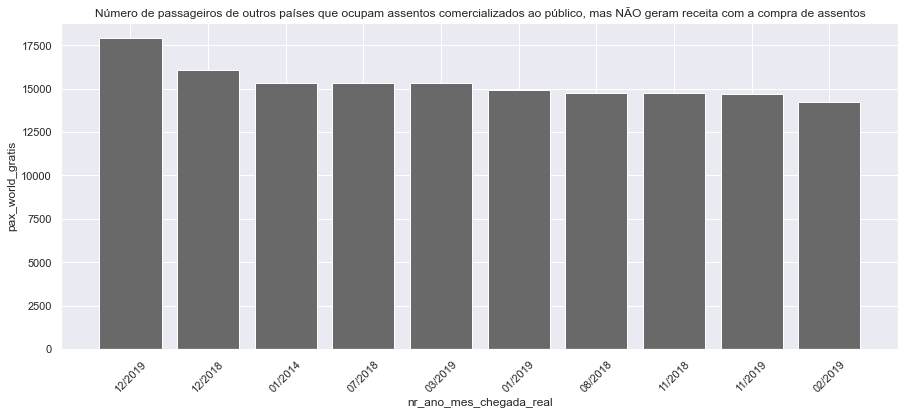

In [196]:
nr_ano_mes_chegada_real = ['12/2019', '12/2018', '01/2014', '07/2018', '03/2019', '01/2019', '08/2018', '11/2018','11/2019', '02/2019']
pax_world_gratis = [17906, 16090, 15349, 15334, 15323, 14953, 14736, 14728, 14669, 14261]
plt.bar(nr_ano_mes_chegada_real, pax_world_gratis, color = 'dimgray')
plt.title('Número de passageiros de outros países que ocupam assentos comercializados ao público, mas NÃO geram receita com a compra de assentos')
plt.xlabel('nr_ano_mes_chegada_real')
plt.ylabel('pax_world_gratis')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [198]:
#número de passageiros do Brasil que ocupam assentos comercializados ao público, mas NÃO geram receita com a compra de assentos
(
    df_consolidado 
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem == "BRASIL"')
    .groupby('nr_ano_mes_chegada_real')
    .agg(pax_local_gratis = ('nr_passag_gratis', 'sum'))
    .sort_values(by='pax_local_gratis', ascending=False)
    .head(10)
)

,pax_local_gratis
nr_ano_mes_chegada_real,
01/2014,208845
04/2019,205596
01/2019,197134
02/2014,193086
10/2018,192391
12/2018,190906
11/2019,188238
11/2018,187413
03/2019,186480


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

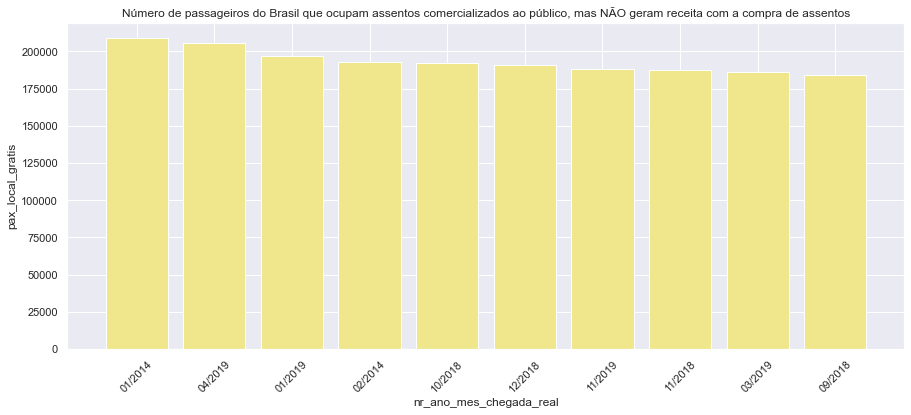

In [199]:
nr_ano_mes_chegada_real = ['01/2014', '04/2019', '01/2019', '02/2014', '10/2018', '12/2018', '11/2019', '11/2018','03/2019', '09/2018']
pax_local_gratis = [208845, 205596, 197134, 193086, 192391, 190906, 188238, 187413, 186480, 184405]
plt.bar(nr_ano_mes_chegada_real, pax_local_gratis, color = 'khaki')
plt.title('Número de passageiros do Brasil que ocupam assentos comercializados ao público, mas NÃO geram receita com a compra de assentos')
plt.xlabel('nr_ano_mes_chegada_real')
plt.ylabel('pax_local_gratis')
plt.rcParams['figure.figsize']=(15, 6)
plt.xticks(rotation=45)#.show()

In [200]:
pd.crosstab(df_consolidado.nm_pais_origem, df_consolidado.nr_ano_mes_chegada_real).head(72).T
#plotar série temporal por país (mais relevantes - top5)

nm_pais_origem,ALEMANHA,ANGOLA,ARGENTINA,ARGÉLIA,ARUBA,ARÁBIA SAUDITA,AUSTRÁLIA,AZERBAIJÃO,BAHAMAS,BARBADOS,...,MARROCOS,MARTINICA,MAURITÂNIA,MÉXICO,NICARÁGUA,NIGÉRIA,NÃO IDENTIFICADO,NÍGER,OMÃ,PANAMÁ
nr_ano_mes_chegada_real,,,,,,,,,,,,,,,,,,,,,
01/2014,177,29,1245,0,9,0,0,0,0,4,...,8,0,0,78,0,1,0,0,0,322
01/2015,154,30,1299,0,14,0,0,0,6,5,...,11,0,0,90,0,4,0,0,0,386
01/2016,156,30,1401,0,16,0,0,0,1,10,...,13,5,0,85,0,1,0,0,0,339
01/2017,124,16,1390,0,1,0,0,0,1,1,...,18,4,0,63,0,0,0,0,0,328
01/2018,140,21,1751,0,0,0,0,0,0,1,...,30,4,0,78,0,0,0,0,0,358
01/2019,131,30,1923,0,0,0,0,0,0,1,...,37,4,0,80,0,4,0,0,0,341
02/2014,173,28,1149,0,8,0,0,0,0,4,...,4,0,0,63,0,0,0,0,0,292
02/2015,137,28,1180,0,16,0,0,0,0,8,...,8,0,0,81,0,3,0,0,0,363
02/2016,147,29,1329,0,11,0,0,0,0,8,...,12,4,0,69,0,0,0,0,0,295


In [201]:
#df_consolidado['nr_ano_partida_real'].head(2)
#df_consolidado.query('nr_ano_partida_real == 2013.0')


,Unnamed: 0,Unnamed: 0.1,id_basica,sg_empresa_iata,nm_empresa,nm_pais,ds_tipo_empresa,nr_voo,dt_referencia,nm_dia_semana_referencia,...,nm_regiao_destino,nm_pais_destino,nm_continente_destino,nr_assentos_ofertados,nr_passag_pagos,nr_passag_gratis,nr_decolagem,total_pax,pais_origem_cia,assentos_livres
62883,62883,62883,11568457,JJ,TAM LINHAS AÉREAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,8108,2014-01-01,QUARTA-FEIRA,...,NaN,FRANÇA,EUROPA,363,315,11,1,326,NaN,37


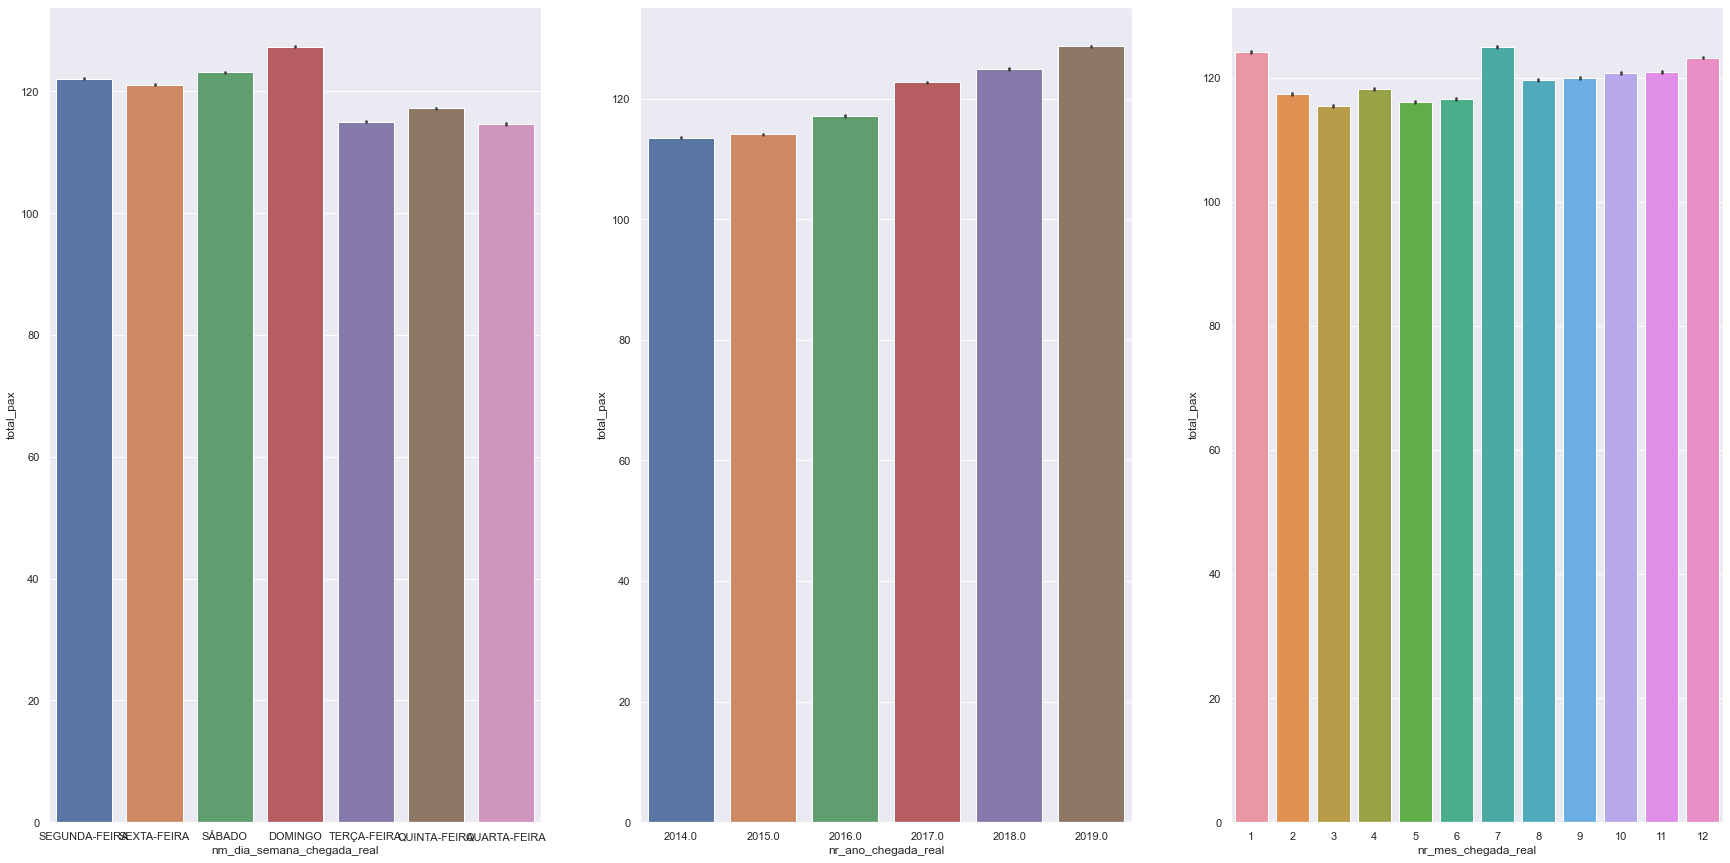

In [225]:
fig, axs = plt.subplots(ncols=3)
sns.set(rc = {'figure.figsize':(30,30)})
ax.tick_params(axis='x', rotation=90)
sns.barplot(data=df_consolidado, x='nm_dia_semana_chegada_real', y='total_pax', ax = axs[0])
sns.barplot(data=df_consolidado, x='nr_ano_chegada_real', y='total_pax', ax = axs[1])
sns.barplot(data=df_consolidado, x='nr_mes_chegada_real', y='total_pax', ax = axs[2])

plt.show()

<AxesSubplot:title={'center':'Chegadas x País'}, xlabel='nm_pais_origem', ylabel='nr_ano_mes_chegada_real'>

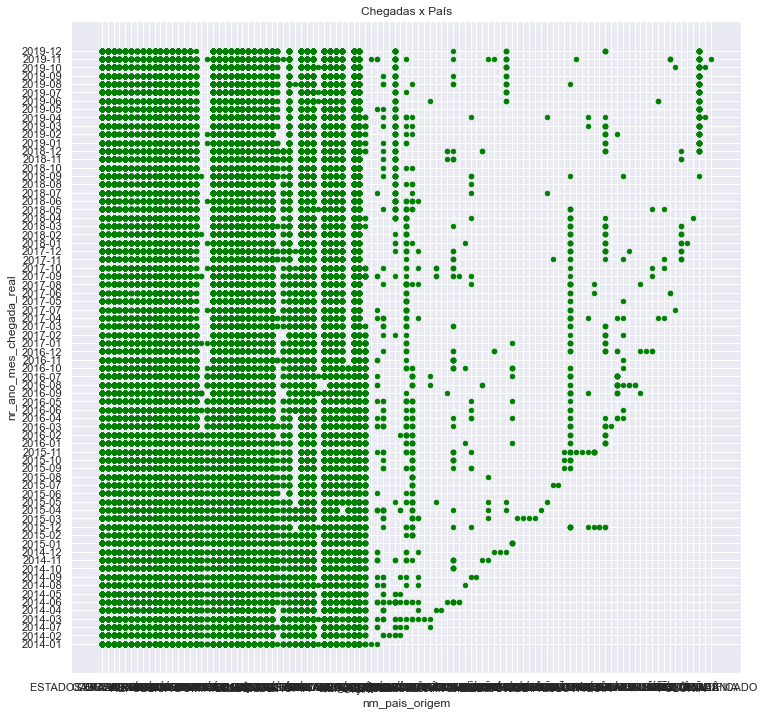

In [ ]:
#Gráfico de Dispersão
df_consolidado.plot(x='nm_pais_origem', y='nr_ano_mes_chegada_real', 
        kind='scatter', 
        title='Chegadas x País', 
        color='green')

In [ ]:
#Box plot
df_consolidado.boxplot(column='nm_pais_origem', by='nr_ano_mes_chegada_real', grid=False)

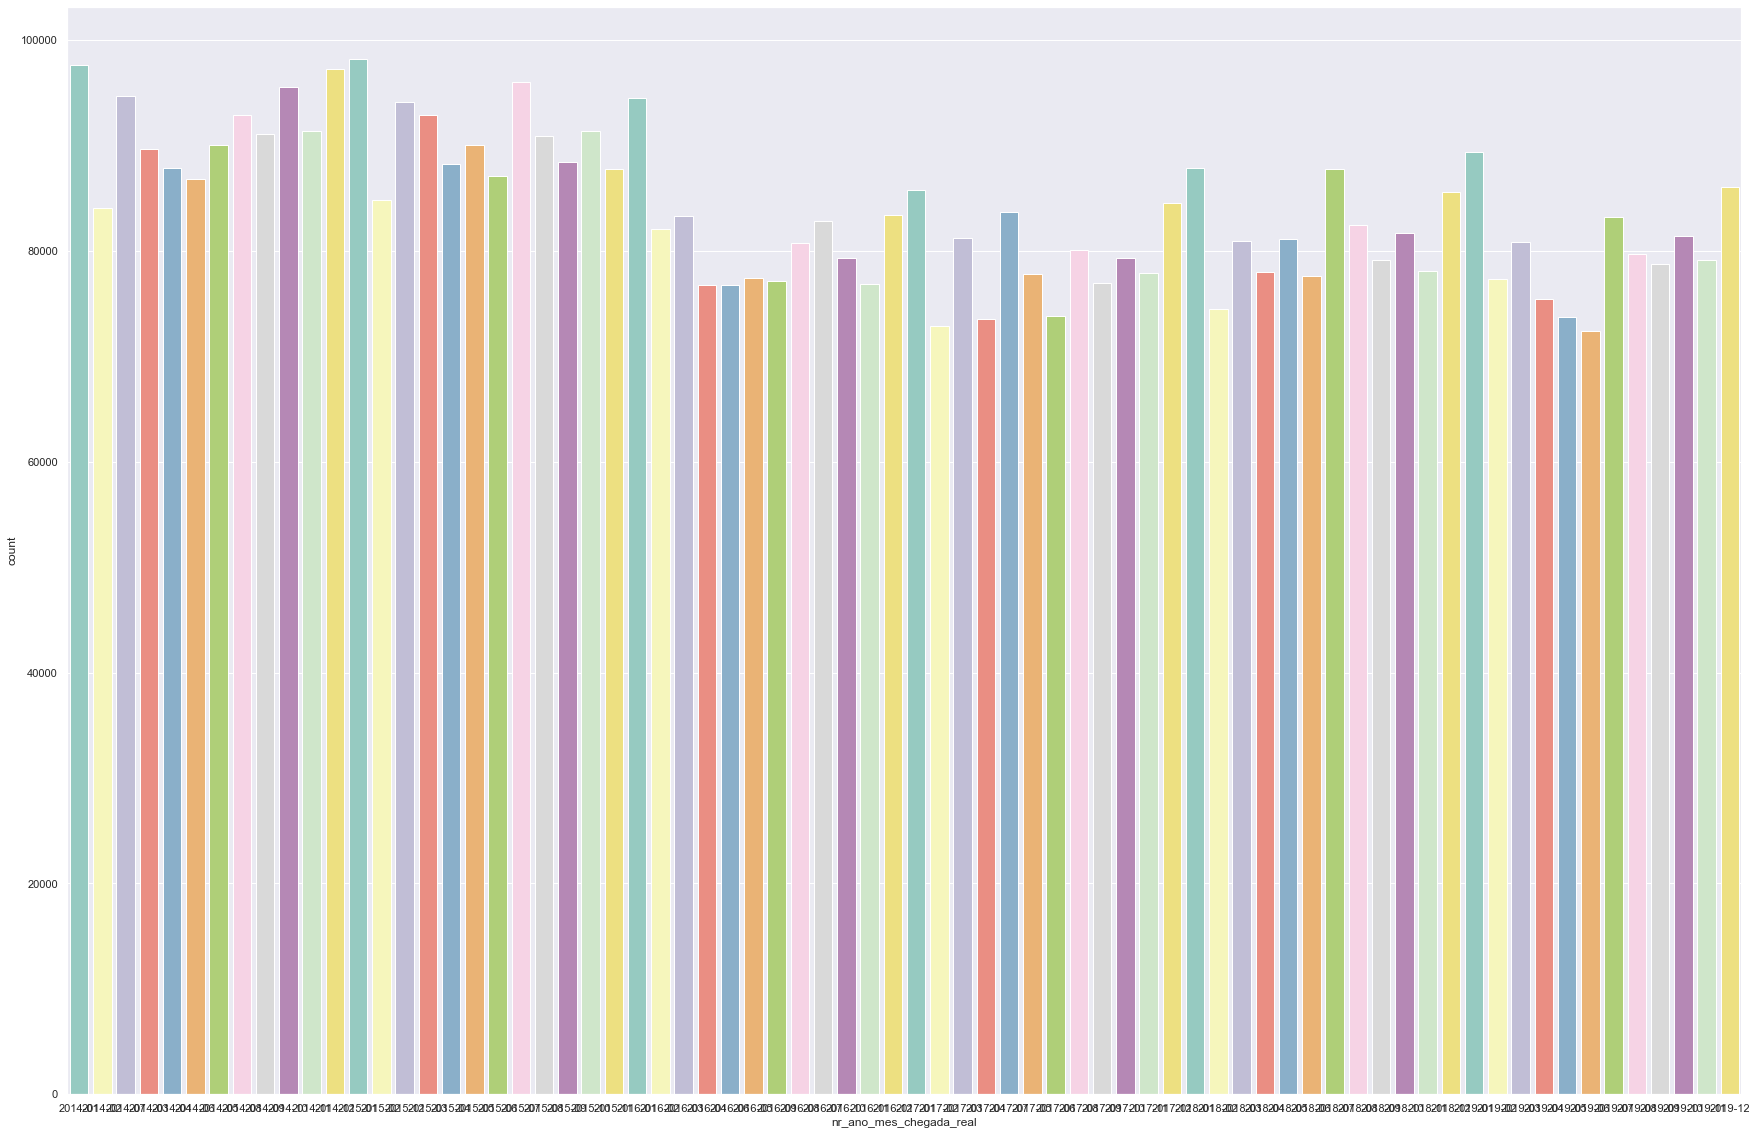

In [ ]:
ax = sns.countplot(x="nr_ano_mes_chegada_real", data=df_consolidado, palette="Set3")
sns.set(rc = {'figure.figsize': (30,30)})
#plt.rcParams['figure.figsize']=(30, 15)
#encontrar uma variavel com menos categorias pro grafico nao ficar poluido (ver com Rodrigo)

#plt.figure(figsize=(15, 6))
#plt.plot(df_ts.qtde_chegadas)
#forecast = ar_3.predict(start='2020-01-01', end='2021-03-01')
#plt.scatter(forecast.index, forecast.values, color='red')
#plt.legend(['qtde_chegadas', 'projeção'])